# Results for the report

### Plotting functions

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def plot_results(
        run_names,
        bold=None,
        metric='validation_f1_micro',
        show_results=True,
        add_metric_name=False,):
    
    results = [get_results(run_name, is_temp=True) for run_name in run_names]

    metric_run_values = {time:[] for time in ["2d", "5d", "13d", "noDS", "all"]}
    for result, run_name in zip(results, run_names):
        if show_results:
            print(run_name)
        best_epoch = np.argmax(result['all']["validation_f1_micro"])
        string = ""
        for cutoff in ["2d", "5d", "13d", "noDS", "all"]:
            metric_value = result[cutoff][metric][best_epoch]
            string += f"& {round(metric_value*100,1)} "
            metric_run_values[cutoff].append(metric_value)
        if show_results:
            print(string)
    # do latex table with avg and std across runs
    string = ""
    metric_dict = {'validation_f1_micro': 'Micro-F1', 'validation_f1_macro': 'Macro-F1', 'validation_auc_micro': 'Micro-AUC', 'validation_auc_macro': 'Macro-AUC'}
    if add_metric_name:
        string +=  f"{metric_dict[metric]}" 
    if bold is None:
        bold = [False]*5
    for cutoff, is_bold in zip(metric_run_values.keys(), bold):
        avg = np.mean(metric_run_values[cutoff])
        std = np.std(metric_run_values[cutoff])
        if is_bold:
            string += f"& " + '\\' + "textbf{" + f"{round(avg*100,1)} " + "}\\" + "textsubscript" + "{" + "$" + "\\" + "pm" + "$" + f"{round(std*100,1)}" + "}"
        else:
            string += f"& "  + f"{round(avg*100,1)} " + "\\" + "textsubscript" + "{" + "$" + "\\" + "pm" + "$" + f"{round(std*100,1)}" + "}"
    string += '\\'+'\\ ' 
    print(string)

In [21]:
def get_results(run_name, is_temp=False):
    results = {}
    if is_temp:
        time_ranges = ['all','2d','5d','13d', 'noDS']
    else:
        time_ranges = ['all']
    for time_range in time_ranges:
        results[time_range] = pd.read_csv(run_name+'_'+time_range+'.csv')
    return results

def plot_training(results, title=None):
    time_ranges = results.keys()
    for time_range in time_ranges:
        plt.plot(results[time_range]['validation_f1_micro'], label=time_range)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Micro-F1 score')
    plt.title("Micro-F1 validation curve " + title)
    plt.show()
    return results

# write code to visualize the validation_f1_score for each time range in the last epoch

def plot_performance(results, title=None):
    plt.bar(range(len(results)), [results[key]['validation_f1_micro'].max() for key in results.keys()], align='center')
    plt.xticks(range(len(results)), list(results.keys()))
    # display value on top of each bar
    for i, v in enumerate([results[key]['validation_f1_micro'].max() for key in results.keys()]):
        plt.text(i - 0.1, v + 0.01, str(round(v, 5)))
    # create another line plot for the number of samples in each time range
    # the plot should have the same x-axis as the bar plot
    # creating a twin Axes sharing the x-axis
    ax2 = plt.twinx()
    ax2.plot(range(len(results)), [results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()], color='red')
    plt.xticks(range(len(results)), list(results.keys()))

    # display value on top of each bar
    for i, v in enumerate([results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()]):
        plt.text(i - 0.1, v - 2, str(round(v, 3)),color="r")
    plt.legend(['Number of samples'])

    plt.ylabel('Micro-F1 score')
    plt.xlabel('Time range')
    plt.title("Best Micro-F1 score "+ title)
    plt.show()

# plot the total, cls and aux loss
def plot_loss(results, title=None):
    losses =  ['train_loss', 'train_loss_aux', 'train_loss_cls']
    for loss in losses:
        plt.plot(results["all"][loss], label=loss)
    plt.title("Losses"+ title)
    plt.legend()
    plt.show()

### 6.1.1 Model tuning

#### Tuning lwan attn heads

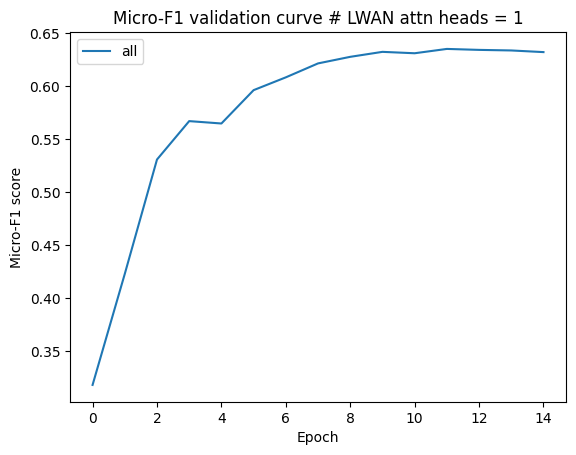

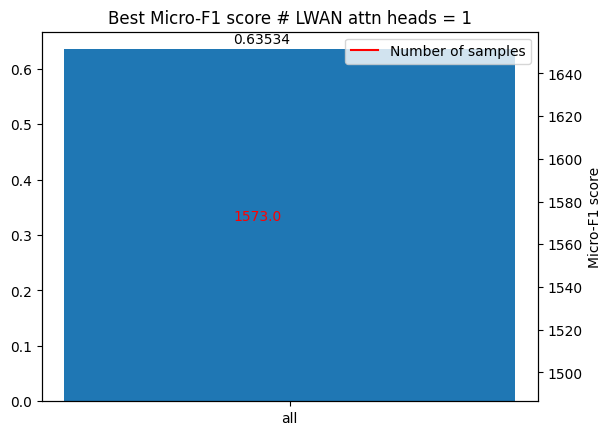

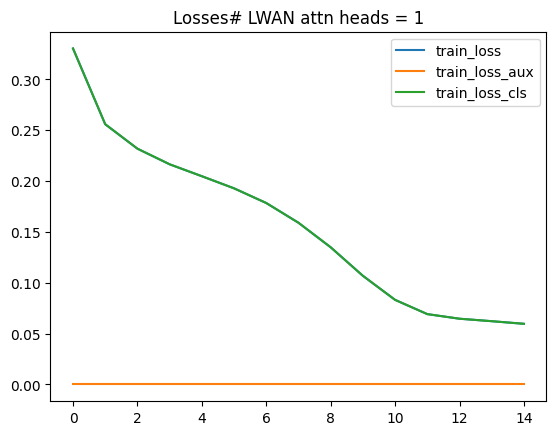

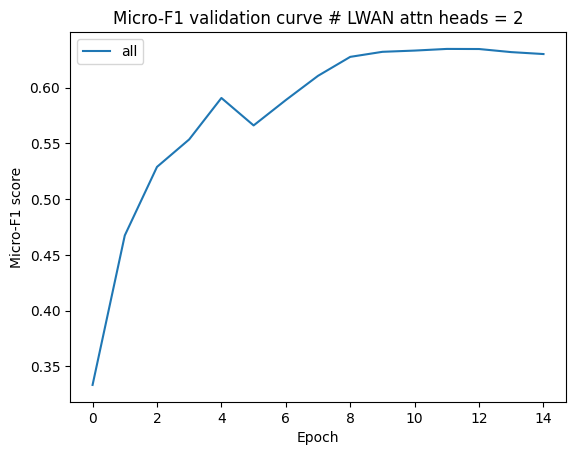

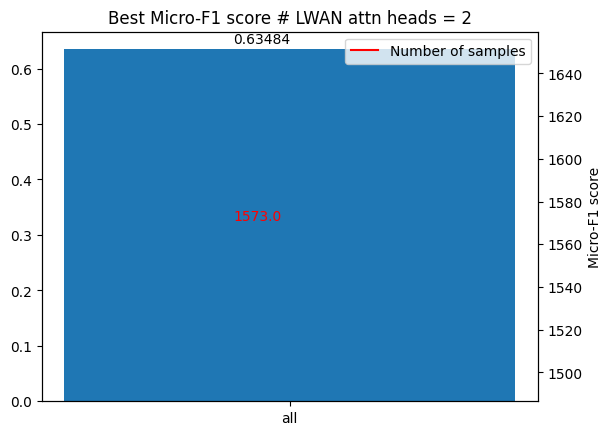

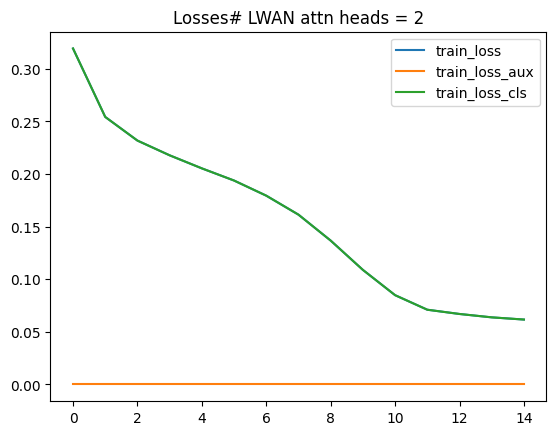

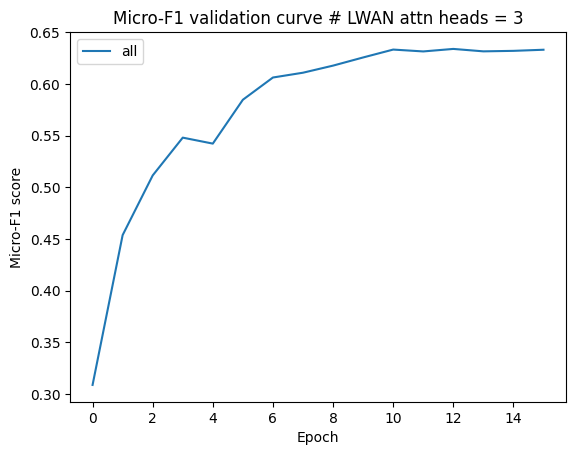

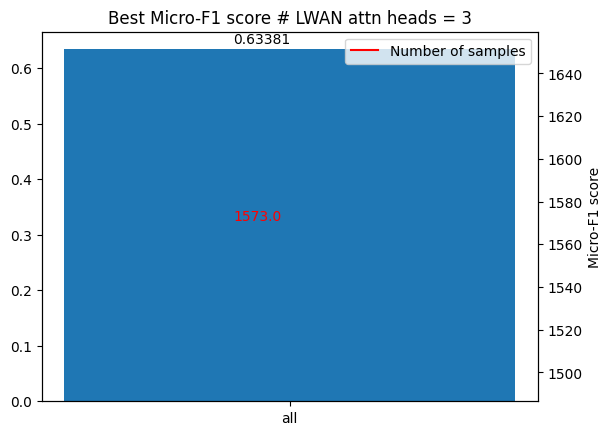

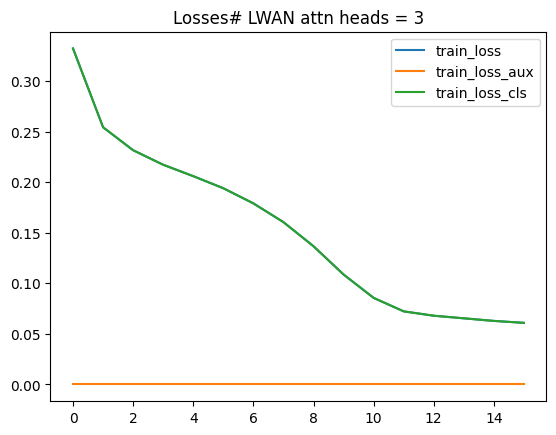

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
run_names = [f"results/Tuning_MMULA_LWAN_heads_{i}" for i in range(1,4)]
results = [get_results(run_name, is_temp=False) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"# LWAN attn heads = {i+1}")
    plot_performance(result, title=f"# LWAN attn heads = {i+1}")
    plot_loss(result, title=f"# LWAN attn heads = {i+1}")

#### Tuning transformer heads (done)

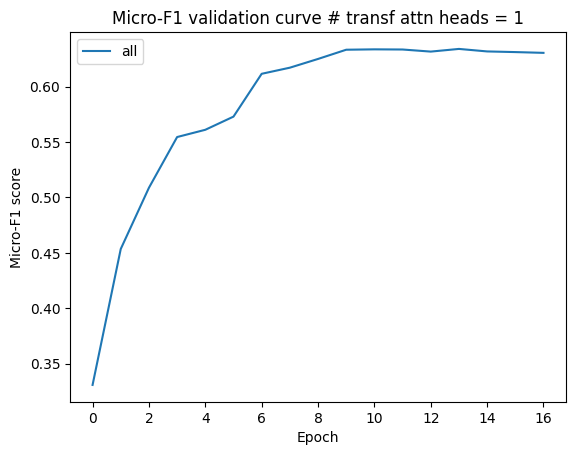

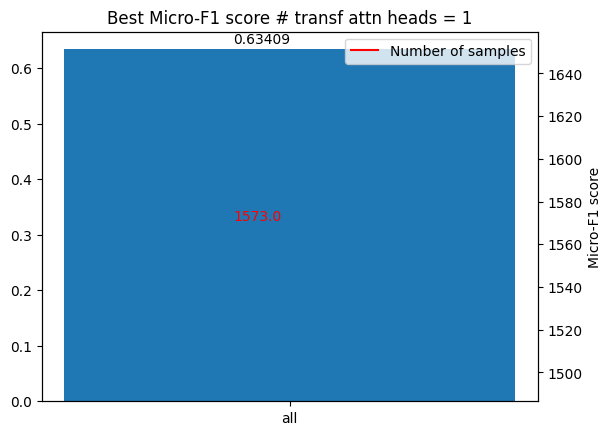

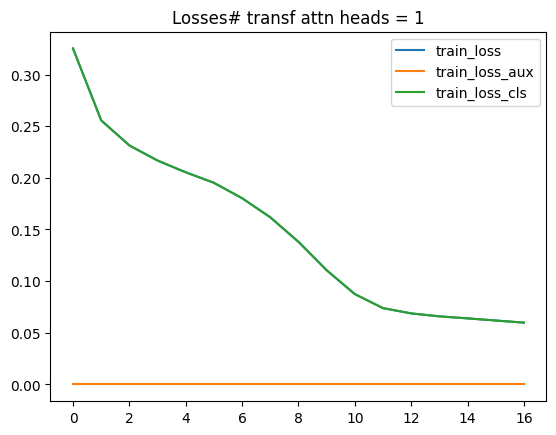

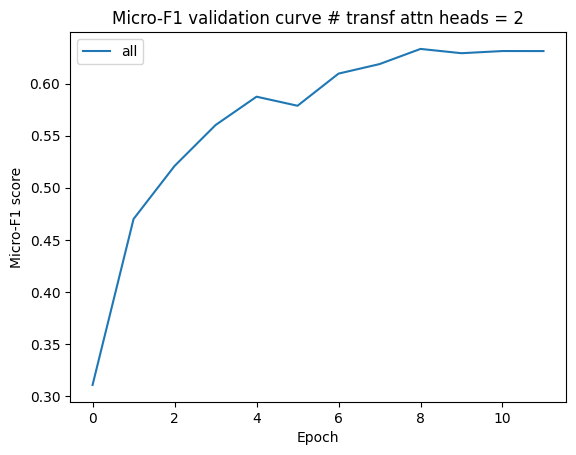

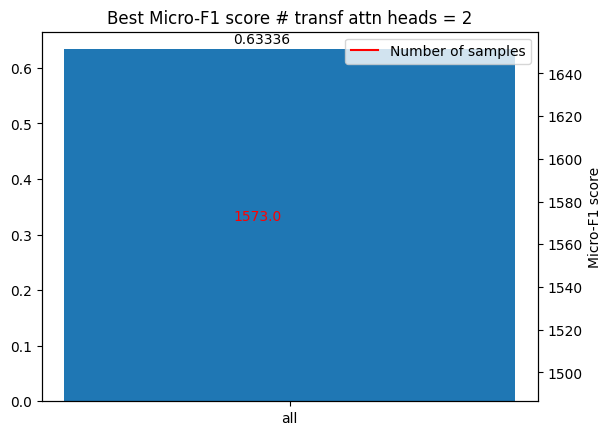

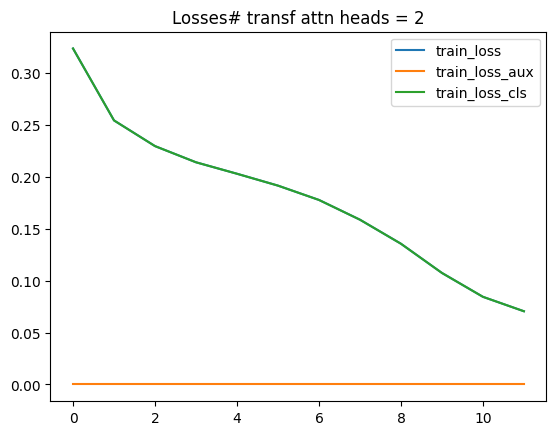

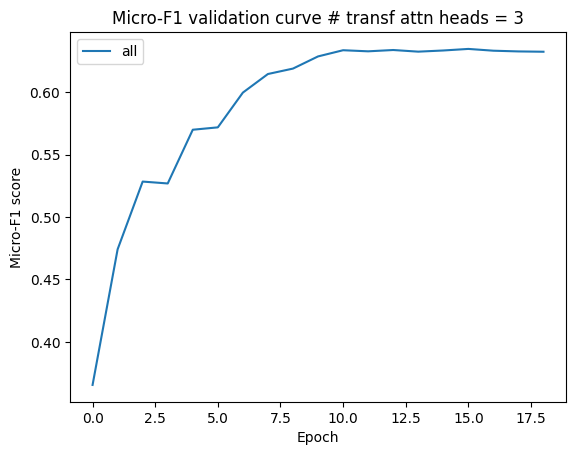

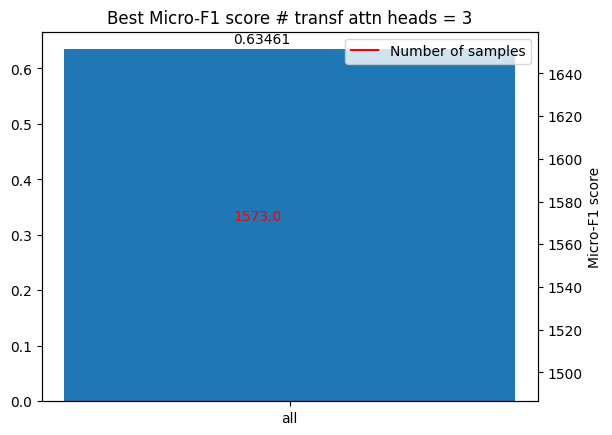

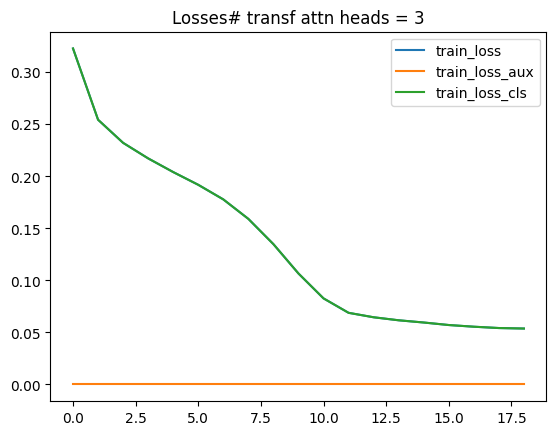

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
run_names = [f"results/Tuning_MMULA_transf_heads_{i}" for i in range(1,4)]
results = [get_results(run_name, is_temp=False) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"# transf attn heads = {i+1}")
    plot_performance(result, title=f"# transf attn heads = {i+1}")
    plot_loss(result, title=f"# transf attn heads = {i+1}")

#### Tuning transformer layers

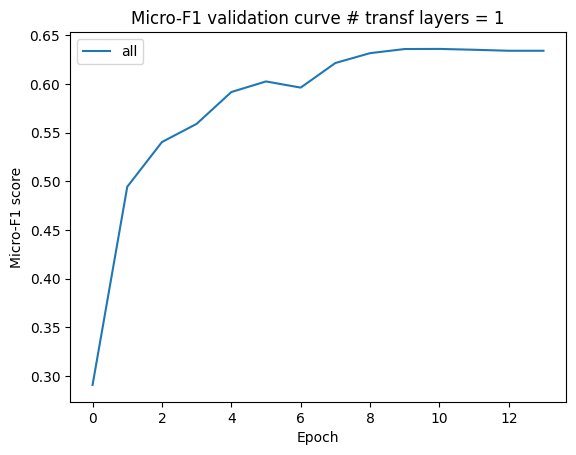

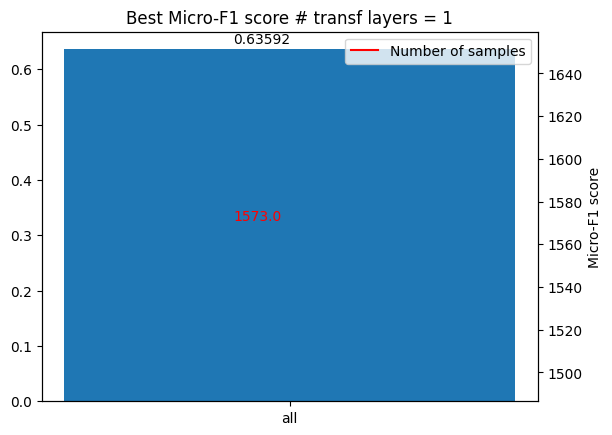

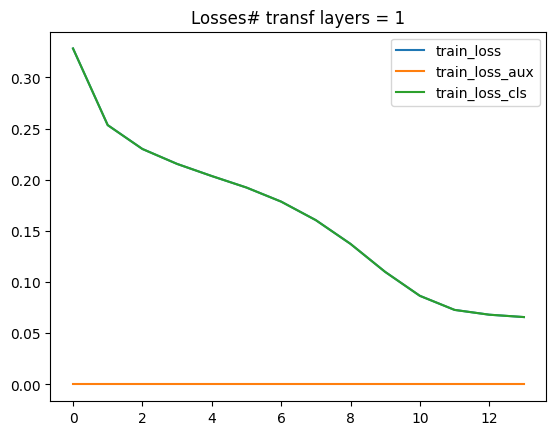

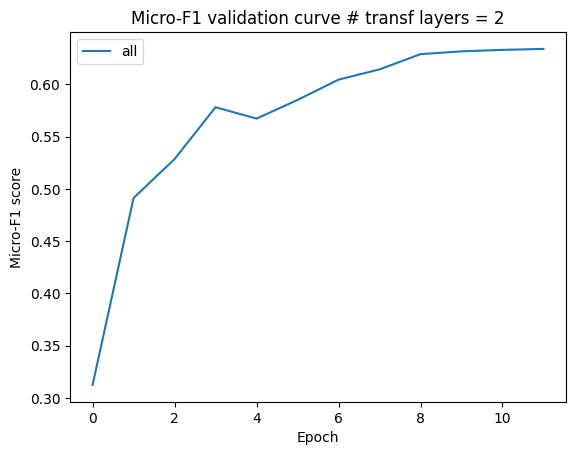

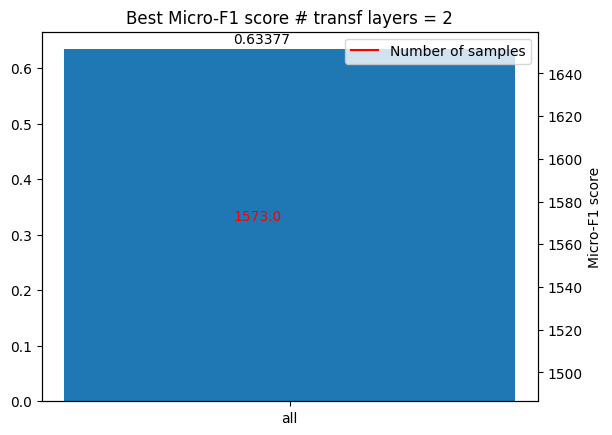

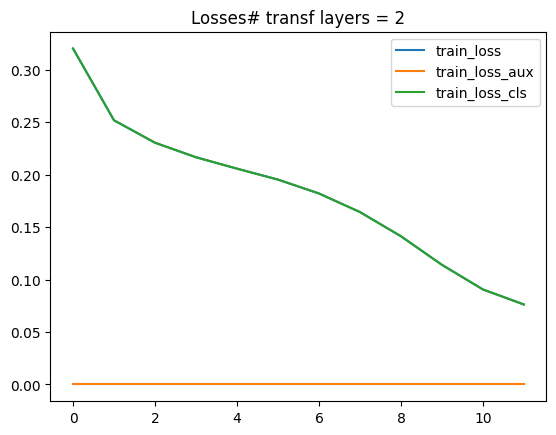

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
run_names = [f"results/Tuning_MMULA_transf_layers_{i}" for i in range(1,3)]
results = [get_results(run_name, is_temp=False) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"# transf layers = {i+1}")
    plot_performance(result, title=f"# transf layers = {i+1}")
    plot_loss(result, title=f"# transf layers = {i+1}")

#### Tuning lr

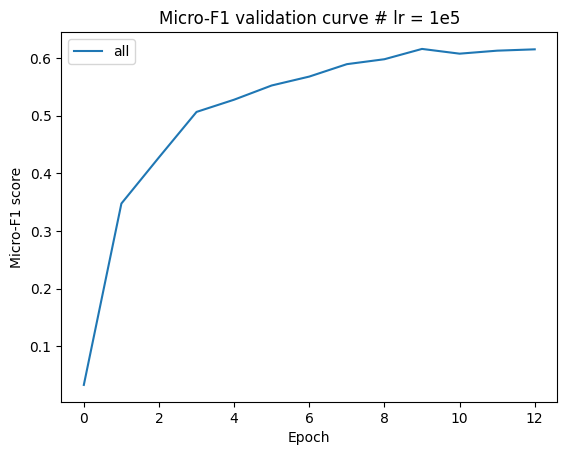

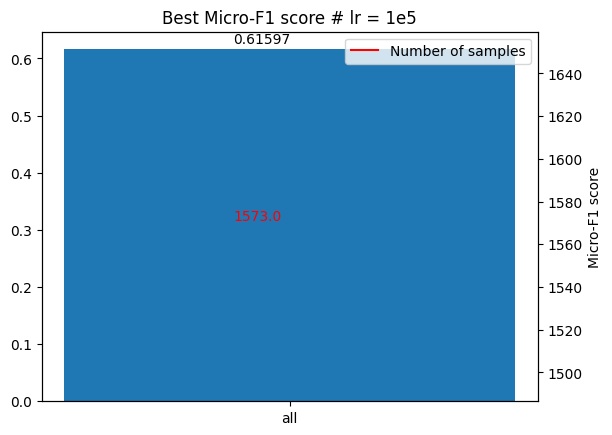

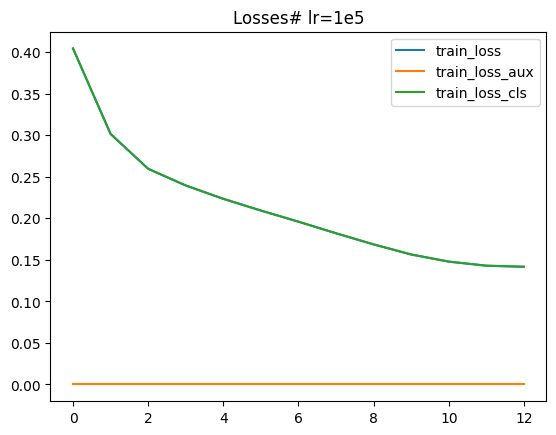

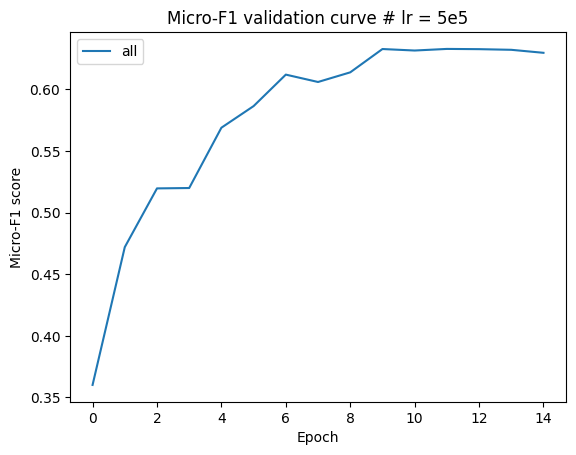

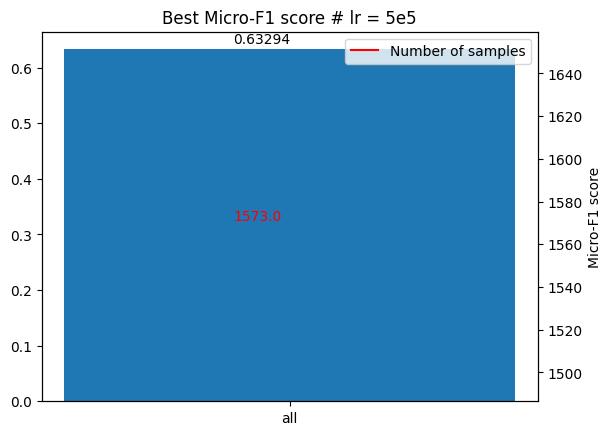

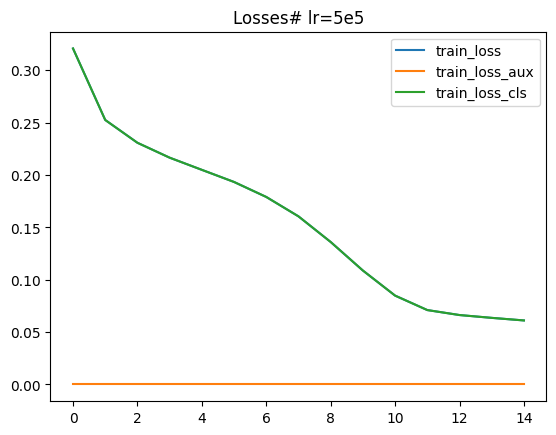

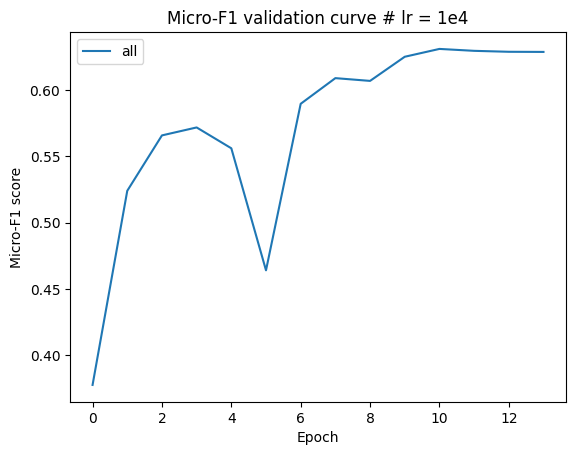

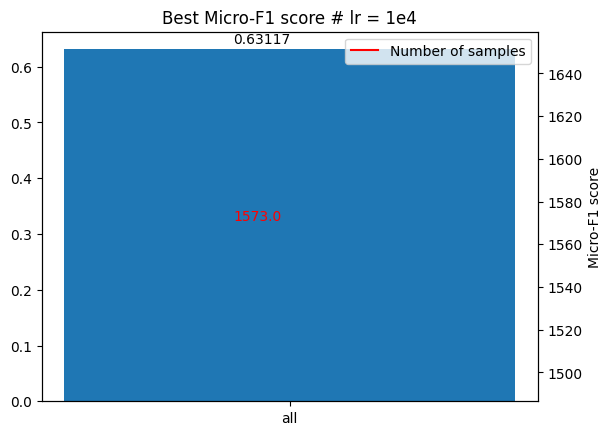

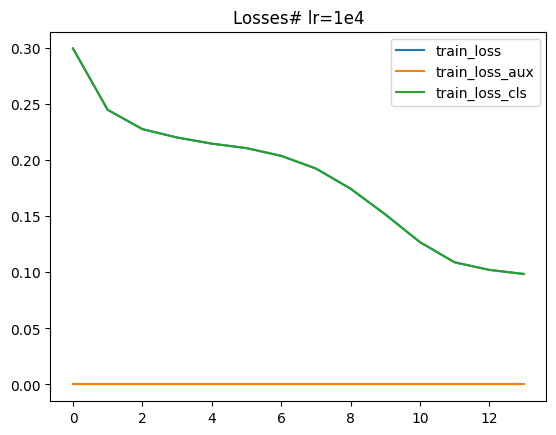

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
lrs = ['1e5', '5e5', '1e4']
run_names = [f"results/Tuning_MMULA_lr_{lr}" for lr in lrs]
results = [get_results(run_name, is_temp=False) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"# lr = {lrs[i]}")
    plot_performance(result, title=f"# lr = {lrs[i]}")
    plot_loss(result, title=f"# lr={lrs[i]}")

### 6.1. MMULA evaluation

#### 6.1.2. Set-up experiments

In [36]:
setup1 = [f"results/{name}" for name in [f"Final_MMULA_AR_1_v2_run{run}" for run in [1,2,3]]]
setup2 = [f"results/{name}" for name in [f"Final_MMULA_AR_2_v2_run{run}" for run in [1,2,3]]]
setup3 = [f"results/{name}" for name in ['Final_MMULA_AR_3_v2', 'Enhancing_MMULA_ar_1', 'Enhancing_MMULA_ar_2']]

# plot results for setup1: validation_f1_micro, validation_f1_macro, validation_auc_micro, validation_auc_macro
plot_results(setup1, [False]*5, metric='validation_f1_micro', show_results=False, add_metric_name=False)
plot_results(setup2, [False]*5, metric='validation_f1_micro', show_results=False, add_metric_name=False)
plot_results(setup3, [True]*5, metric='validation_f1_micro', show_results=False, add_metric_name=False)
print("\n")
plot_results(setup1, [False]*5, metric='validation_f1_macro', show_results=False, add_metric_name=False)
plot_results(setup2, [False]*5, metric='validation_f1_macro', show_results=False, add_metric_name=False)
plot_results(setup3, [True]*5, metric='validation_f1_macro', show_results=False, add_metric_name=False)
print("\n")
plot_results(setup1, [False]*5, metric='validation_auc_micro', show_results=False, add_metric_name=False)
plot_results(setup2, [False]*5, metric='validation_auc_micro', show_results=False, add_metric_name=False)
plot_results(setup3, [True]*5, metric='validation_auc_micro', show_results=False, add_metric_name=False)
print("\n")
plot_results(setup1, [False]*5, metric='validation_auc_macro', show_results=False, add_metric_name=False)
plot_results(setup2, [False]*5, metric='validation_auc_macro', show_results=False, add_metric_name=False)
plot_results(setup3, [True]*5, metric='validation_auc_macro', show_results=False, add_metric_name=False)
print("\n")

& 33.5 \textsubscript{$\pm$0.6}& 37.6 \textsubscript{$\pm$0.3}& 38.2 \textsubscript{$\pm$0.1}& 37.9 \textsubscript{$\pm$0.2}& 71.0 \textsubscript{$\pm$0.3}\\ 
& 29.2 \textsubscript{$\pm$0.5}& 35.1 \textsubscript{$\pm$0.4}& 37.7 \textsubscript{$\pm$0.5}& 38.4 \textsubscript{$\pm$0.4}& 71.3 \textsubscript{$\pm$0.2}\\ 
& \textbf{39.8 }\textsubscript{$\pm$0.1}& \textbf{45.2 }\textsubscript{$\pm$0.1}& \textbf{49.1 }\textsubscript{$\pm$0.1}& \textbf{50.2 }\textsubscript{$\pm$0.2}& \textbf{65.2 }\textsubscript{$\pm$0.1}\\ 


& 27.9 \textsubscript{$\pm$0.7}& 32.5 \textsubscript{$\pm$0.4}& 33.4 \textsubscript{$\pm$0.2}& 33.1 \textsubscript{$\pm$0.2}& 66.1 \textsubscript{$\pm$0.5}\\ 
& 24.2 \textsubscript{$\pm$0.6}& 30.1 \textsubscript{$\pm$0.4}& 32.5 \textsubscript{$\pm$0.5}& 33.3 \textsubscript{$\pm$0.5}& 66.7 \textsubscript{$\pm$0.2}\\ 
& \textbf{33.7 }\textsubscript{$\pm$0.3}& \textbf{39.7 }\textsubscript{$\pm$0.3}& \textbf{43.6 }\textsubscript{$\pm$0.2}& \textbf{45.1 }\textsubscript{$\pm$0.

### 6.2. Evaluation of enhancement proposals


#### 6.2.1. Auxiliary task comparison

Last embedding prediction:

In [26]:
detransf = [f"results/{name}" for name in [f"Enhancing_MMULA_last_de_deg_{i}" for i in range(1,4)]]
bold = [True, True, True, True, True, True]
plot_results(detransf)



results/Enhancing_MMULA_last_de_deg_1
& 40.9 & 46.5 & 50.0 & 51.3 & 65.1 
results/Enhancing_MMULA_last_de_deg_2
& 40.3 & 45.4 & 49.5 & 50.6 & 65.0 
results/Enhancing_MMULA_last_de_deg_3
& 41.1 & 46.5 & 50.5 & 51.6 & 65.0 
& 40.8 \textsubscript{$\pm$0.3}& 46.1 \textsubscript{$\pm$0.5}& 50.0 \textsubscript{$\pm$0.4}& 51.2 \textsubscript{$\pm$0.4}& 65.0 \textsubscript{$\pm$0.1}\\ 


Next document category prediction:

In [35]:
dc = [f"results/{name}" for name in [f"Enhancing_MMULA_dc_{i}" for i in range(1,4)]]

plot_results(dc)


results/Enhancing_MMULA_dc_1
& 39.9 & 45.1 & 48.7 & 49.7 & 65.2 
results/Enhancing_MMULA_dc_2
& 39.8 & 45.3 & 49.0 & 50.1 & 64.9 
results/Enhancing_MMULA_dc_3
& 40.9 & 45.9 & 49.5 & 50.5 & 64.9 
& 40.2 \textsubscript{$\pm$0.5}& 45.4 \textsubscript{$\pm$0.4}& 49.0 \textsubscript{$\pm$0.4}& 50.1 \textsubscript{$\pm$0.4}& 65.0 \textsubscript{$\pm$0.1}\\ 


#### 6.2.2. Extended-length algorithm (ELA) evaluation

In [36]:
length_indep = [f"results/{name}" for name in [f"Enhancing_MMULA_length_indep_{i}" for i in range(1,4)]]
plot_results(length_indep, [True]*5)

results/Enhancing_MMULA_length_indep_1
& 46.3 & 50.9 & 53.9 & 54.5 & 71.0 
results/Enhancing_MMULA_length_indep_2
& 46.1 & 50.7 & 53.3 & 54.1 & 71.1 
results/Enhancing_MMULA_length_indep_3
& 46.4 & 51.1 & 53.7 & 54.5 & 71.2 
& \textbf{46.2 }\textsubscript{$\pm$0.1}& \textbf{50.9 }\textsubscript{$\pm$0.1}& \textbf{53.6 }\textsubscript{$\pm$0.2}& \textbf{54.3 }\textsubscript{$\pm$0.2}& \textbf{71.1 }\textsubscript{$\pm$0.1}\\ 


### 6.3. Ablation studes

#### 6.3.1. Effect of document embedding generator

In [9]:
denotransf = [f"results/{name}" for name in [f"Enhancing_MMULA_last_de_notransf_{num}" for num in [1,2,3]]]
bold = [False]*5
plot_results(denotransf, bold)


results/Enhancing_MMULA_last_de_notransf_1
& 38.4 & 44.7 & 48.8 & 50.1 & 64.8 
results/Enhancing_MMULA_last_de_notransf_2
& 36.9 & 43.2 & 47.5 & 48.7 & 65.0 
results/Enhancing_MMULA_last_de_notransf_3
& 37.6 & 43.7 & 48.3 & 49.6 & 65.2 
& 37.6 \textsubscript{$\pm$0.6}& 43.9 \textsubscript{$\pm$0.6}& 48.2 \textsubscript{$\pm$0.5}& 49.5 \textsubscript{$\pm$0.6}& 65.0 \textsubscript{$\pm$0.2}


#### 6.3.2. Effect of random sampling

In [7]:
length_indep = [f"results/{name}" for name in [f"Enhancing_MMULA_length_indep_ablate_{run}" for run in [1,2,3]]]
plot_results(length_indep, [False]*5)

results/Enhancing_MMULA_length_indep_ablate_1
& 38.0 & 42.7 & 45.4 & 46.4 & 70.3 
results/Enhancing_MMULA_length_indep_ablate_2
& 37.6 & 42.4 & 45.3 & 46.3 & 69.9 
results/Enhancing_MMULA_length_indep_ablate_3
& 37.7 & 42.5 & 45.5 & 46.3 & 70.4 
& 37.8 \textsubscript{$\pm$0.2}& 42.5 \textsubscript{$\pm$0.1}& 45.4 \textsubscript{$\pm$0.1}& 46.3 \textsubscript{$\pm$0.1}& 70.2 \textsubscript{$\pm$0.2}


#### 6.4. Test set evaluation

In [1]:
import pandas as pd
import ipdb 
import json 

def get_test_results(run_path):
    try:
        results = json.load(open('results/TEST_'+run_path+'.json'))
        return results
    except:
        print('No results found for run: '+run_path)
def print_test_results(results, metric='f1_micro', bold=[False]*5, show_results=False):
    cutoffs = ['2d', '5d', '13d', 'noDS', 'all']
    metric_values = {cutoff:[] for cutoff in cutoffs}
    for result in results:
        string = ""
        for cutoff in cutoffs:
            metric_values[cutoff].append(result[cutoff][metric])
            string += f"& " + f"{round(result[cutoff][metric]*100,1)} "
        if show_results:
            print(string)
    string = ""
    for cutoff, is_bold in zip(metric_values.keys(), bold):
        avg = np.mean(metric_values[cutoff])
        std = np.std(metric_values[cutoff])
        if is_bold:
            string += f"& " + '\\' + "textbf{" + f"{round(avg*100,1)} " + "}\\" + "textsubscript" + "{" + "$" + "\\" + "pm" + "$" + f"{round(std*100,1)}" + "}"
        else:
            string += f"& "  + f"{round(avg*100,1)} " + "\\" + "textsubscript" + "{" + "$" + "\\" + "pm" + "$" + f"{round(std*100,1)}" + "}"
    string += '\\'+'\\ ' 
    print(string)


In [41]:
baseline3 = [get_test_results(path) for path in [f"Enhancing_MMULA_ar_{run}" for run in [1,2,3]]]
baseline1 = [get_test_results(path) for path in [f"Final_MMULA_AR_1_v2_run{run}" for run in [1,2,3]]]
baseline2 = [get_test_results(path) for path in [f"Final_MMULA_AR_2_v2_run{run}" for run in [1,2,3]]]
aux2 = [get_test_results(path) for path in [f"Enhancing_MMULA_last_de_transf_{run}" for run in [1,2,3]]]
ela = [get_test_results(path) for path in [f"Enhancing_MMULA_length_indep_{run}" for run in [1,2,3]]]


In [42]:
print_test_results(baseline1)
print_test_results(baseline2)
print_test_results(baseline3)
print_test_results(aux2)
print_test_results(ela)

& 32.6 \textsubscript{$\pm$0.1}& 36.1 \textsubscript{$\pm$0.1}& 37.3 \textsubscript{$\pm$0.2}& 36.8 \textsubscript{$\pm$0.2}& 70.6 \textsubscript{$\pm$0.2}\\ 
& 28.8 \textsubscript{$\pm$0.1}& 33.7 \textsubscript{$\pm$0.1}& 36.6 \textsubscript{$\pm$0.2}& 37.3 \textsubscript{$\pm$0.3}& 70.6 \textsubscript{$\pm$0.2}\\ 
& 39.5 \textsubscript{$\pm$0.2}& 44.5 \textsubscript{$\pm$0.2}& 48.1 \textsubscript{$\pm$0.2}& 48.7 \textsubscript{$\pm$0.1}& 64.2 \textsubscript{$\pm$0.3}\\ 
& 40.1 \textsubscript{$\pm$0.7}& 44.9 \textsubscript{$\pm$0.7}& 48.6 \textsubscript{$\pm$0.7}& 49.2 \textsubscript{$\pm$0.7}& 64.1 \textsubscript{$\pm$0.1}\\ 
& 46.0 \textsubscript{$\pm$0.2}& 50.3 \textsubscript{$\pm$0.1}& 52.9 \textsubscript{$\pm$0.2}& 53.5 \textsubscript{$\pm$0.2}& 70.3 \textsubscript{$\pm$0.1}\\ 
